# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


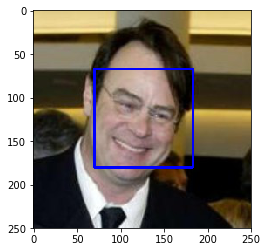

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## DONE : Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_prediction = []
for i in range(len(human_files_short)):
    human_prediction.append( face_detector(human_files_short[i]) )
    
print('Percent of human images with a face : ', 100 * np.count_nonzero(human_prediction) / len(human_prediction))

dog_prediction = []
for i in range(len(dog_files_short)):
    dog_prediction.append( face_detector(dog_files_short[i]) )
    
print('Percent of dog images with a face : ', 100 * np.count_nonzero(dog_prediction) / len(dog_prediction))


Percent of human images with a face :  98.0
Percent of dog images with a face :  17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### DONE : Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

# let's try an LBP cascade
face_cascade = cv2.CascadeClassifier('haarcascades/lbpcascade_frontalface_improved.xml')

human_prediction = []
for i in range(len(human_files_short)):
    human_prediction.append( face_detector(human_files_short[i]) )
    
print('Percent of human images with a face : ', 100 * np.count_nonzero(human_prediction) / len(human_prediction))

dog_prediction = []
for i in range(len(dog_files_short)):
    dog_prediction.append( face_detector(dog_files_short[i]) )
    
print('Percent of dog images with a face : ', 100 * np.count_nonzero(dog_prediction) / len(dog_prediction))

Percent of human images with a face :  82.0
Percent of dog images with a face :  6.0


In [6]:
# another version
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

human_prediction = []
for i in range(len(human_files_short)):
    human_prediction.append( face_detector(human_files_short[i]) )
    
print('Percent of human images with a face : ', 100 * np.count_nonzero(human_prediction) / len(human_prediction))

dog_prediction = []
for i in range(len(dog_files_short)):
    dog_prediction.append( face_detector(dog_files_short[i]) )
    
print('Percent of dog images with a face : ', 100 * np.count_nonzero(dog_prediction) / len(dog_prediction))


Percent of human images with a face :  100.0
Percent of dog images with a face :  21.0


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 102969261.59it/s]


In [8]:
if use_cuda:
    print("Using CUDA")
else:
    print("Using CPU")

Using CUDA


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms


def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model

    mean = [0.485, 0.456, 0.406]
    std  = [0.229, 0.224, 0.225]    
    
    process = transforms.Compose([
              transforms.Resize(256),
              transforms.CenterCrop(224),
              transforms.ToTensor(),
              transforms.Normalize(mean, std) 
    ])
    
    npimage = process(image).numpy()
    
    return npimage
   

# test the image processing function

image = process_image(Image.open('uploads/test.jpg'))
print(image.shape)

(3, 224, 224)


In [10]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## DONE : Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    # only interested in top result for now
    topk = 1
    
    # load the file using PIL
    image = Image.open(img_path)

    # input data pre-processing
    image_data = process_image(image)
    
    # convert to torch tensor
    image_tensor = torch.from_numpy(image_data).float()

    # move to compute device
    image_tensor = image_tensor.to(device)
    
    # make sure in inference mode
    VGG16.eval()
    
    # feed forward
    output = VGG16(image_tensor.view(1,3,224,224))

    # output probabilities
    ps = torch.exp(output)

    # top k probabilities
    top_ps,top_class = ps.topk(topk, dim=1)

    # return results as python lists
    probs = top_ps.cpu().detach().tolist()[0]
    classes = top_class.cpu().detach().tolist()[0]
   
    # predicted class index
    return top_class 

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    ## DONE : Complete the function.
    
    prediction = VGG16_predict(img_path)
    
    return ((prediction <= 268) & (prediction >= 151))


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [12]:
### DONE : Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_prediction = []
for i in range(len(human_files_short)):
    human_prediction.append( dog_detector(human_files_short[i]) )
    
print('Percent of human images with a dog : ', 100 * np.count_nonzero(human_prediction) / len(human_prediction))

dog_prediction = []
for i in range(len(dog_files_short)):
    dog_prediction.append( dog_detector(dog_files_short[i]) )
    
print('Percent of dog images with a dog : ', 100 * np.count_nonzero(dog_prediction) / len(dog_prediction))


Percent of human images with a dog :  0.0
Percent of dog images with a dog :  100.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [13]:
import time
import os
from collections import OrderedDict
from datetime import datetime
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import utils

### DONE : Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

In [14]:
# Data folders

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'


# Data parameters

batch_size  = 40


# Define transforms for the training, validation, and testing sets

data_transforms = {
    'train' : transforms.Compose([transforms.RandomResizedCrop(224),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomRotation(45),
                                  transforms.ToTensor()
                                 ]),
    'valid' : transforms.Compose([transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor()
                                 ]),
    'test'  : transforms.Compose([transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor()
                                 ])
}


# Load the datasets with ImageFolder

image_datasets = {
    'train' : datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(valid_dir, transform=data_transforms['valid']),
    'test'  : datasets.ImageFolder(test_dir, transform=data_transforms['test'])
}


# Using the image datasets and the trainforms, define the dataloaders

dataloaders = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'], batch_size=batch_size),
    'test'  : torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size)
}


# Class label dictionary

class_to_idx    = image_datasets['train'].class_to_idx


# Additional properties

n_images_train  = len(image_datasets['train'])
n_images_valid  = len(image_datasets['valid'])
n_images_test   = len(image_datasets['test'])
n_outputs       = len(class_to_idx)


# Warn if missing data

print(f"{n_images_train} training images" if dataloaders['train'] else
      f"! No training images found in {train_dir}")

print(f"{n_images_valid} validation images" if dataloaders['valid'] else
      f"! No validation images found in {valid_dir}")

print(f"{n_images_test} test images" if dataloaders['test'] else
      f"! No test images found in {test_dir}")

print(f"{n_outputs} output classes")


6680 training images
835 validation images
836 test images
133 output classes


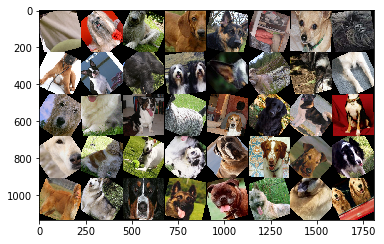

In [15]:
# Show one batch of training images

def plot_images(images, labels): 
    img_grid = utils.make_grid(images, nrow=8, normalize=True)
    np_img = img_grid.numpy().transpose(1,2,0)  
    plt.imshow(np_img)

    
train_iter = iter(dataloaders['train'])
images, labels = train_iter.next()
plot_images(images,labels)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

> Images are sized to VGG expected input size of 224x224.

> Training data is augmented with rotations - our canine friends being playful and all.

> Training data is augmented with horizontal flips - I believe that was an error, I wanted flips along the vertical axis, but the model already spent considerable time training successfully, so I left it, just noted the error.

> Validation and Testing images are not augmented, just sized correctly.

> All transformations are performed by torchvision.transforms and output as a tensor.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
# Hyperparameters for scratch model

learn_rate  = 0.02
dropout     = 0.2
epochs      = 40
val_every   = 50
train_stats = []

# Display templates

layout_vh   = "{:^8} {:<6} {:>12} {:>12} {:>12} {:>10} {:>8}"
layout_vr   = "{:^3d}/{:<4d} {:<6d} {:>12.3f} {:>12.3f} {:>12.3f} {:>10} {:>8}"


In [17]:
# define the CNN architecture
class Net(nn.Module):
    
    ### DONE : choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.batch1 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.batch2 = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.batch3 = nn.BatchNorm2d(64)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.batch4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.batch5 = nn.BatchNorm2d(256)
        self.pool5 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 7 * 7, 2048)
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(2048, 512)
        self.dropout2 = nn.Dropout(dropout)
        self.fc3 = nn.Linear(512, n_outputs)
        
        
    def forward(self, x):
        
        x = F.relu(self.batch1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.batch2(self.conv2(x)))
        x = self.pool2(x)
        x = F.relu(self.batch3(self.conv3(x)))
        x = self.pool3(x)
        x = F.relu(self.batch4(self.conv4(x)))
        x = self.pool4(x)
        x = F.relu(self.batch5(self.conv5(x)))
        x = self.pool5(x)
        x = x.view(-1, 256 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dil

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

> I had to stay within reasonable training times - I looked at existing simple architectures, such as AlexNet, to get an idea of what already works.

> Started with 16 convolutions, increasing depth in powers of two up to 256 features. Only 1 per layer, to be economical with computational resources. I noticed some of the established CNNs tend to triple each layer.

> Stride 3 with padding 1 was chosen to ensure entire convolution gets included in processing.

> The linear layers underwent much experimentation, these fully connected layers of 2048 > 512 > 133 yielded high teens accuracy, so I took it.

> Initially my model didn't learn at all, after much troubleshooting I found help in the Udacity forums - I had to add batch layers - then it started learning.



### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

> Note to self :<br>
CrossEntropyLoss : logits out, for probabilities apply softmax<br>
NLLLoss          : logsoftmax out, for probabilities apply exp

In [18]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=learn_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    '''
        Returns trained model
    '''
    
    # begin training

    start_date = datetime.now().strftime("%d-%m-%Y %H:%M:%S UTC")
    start_time = time.time()

    print(f"Started training  : {start_date}")
    print(f"Learn rate        : {learn_rate}")
    print(f"Training images   : {n_images_train}")
    print(f"Validation images : {n_images_valid}")
    print(f"Testing images    : {n_images_test}")
    print(f"Outputs           : {n_outputs}")
    print()
    print(layout_vh.format('Epoch','Step','Train loss','Val loss','Accuracy%','Elapsed','Saved'))

    # reset step counter
    step = 0
    train_stats.clear()
    
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        
        # monitor training
        train_loss = 0.0
        valid_loss = 0.0
        accuracy   = 0.0
        correct    = 0.0
        total      = 0.0
        
        ###################
        # train the model #
        ###################
        
        model.train()
        
        for batch_idx, (data, target) in enumerate(dataloaders['train']):
            
            # step counter
            step += 1

            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # clear gradients
            optimizer.zero_grad()
            
            # forward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # optimization step - parameter update
            optimizer.step()
            
            # update average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))

            
            # validate and display progress every N training batches
            if step % val_every == 0:

                ######################
                # validate the model #
                ######################

                model.eval()

                with torch.no_grad():

                    for valid_idx, (data, target) in enumerate(dataloaders['valid']):

                        # move to GPU
                        if use_cuda:
                            data, target = data.cuda(), target.cuda()

                        # forward pass
                        output = model(data)

                        # calculate batch loss
                        loss = criterion(output, target)

                        # update average validation loss
                        valid_loss = valid_loss + ((1 / (valid_idx + 1)) * (loss.item() - valid_loss))
                        
                        # convert output probabilities to predicted class
                        pred = output.data.max(1, keepdim=True)[1]
                        
                        # compare predictions to true label
                        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
                        total += data.size(0)
                
                # compute accuracy
                accuracy = (100. * correct / total)

                # save checkpoint if best
                saved=''
                if valid_loss < valid_loss_min:
                    torch.save(model.state_dict(), save_path)
                    valid_loss_min = valid_loss
                    saved='Y'

                # update elapsed time
                elapsed_time = time.strftime('%H:%M:%S',time.gmtime(time.time() - start_time))

                # store stats
                train_stats.append([epoch, step, train_loss, valid_loss, accuracy, elapsed_time])
                
                # output stats
                print(layout_vr.format(epoch, epochs, step, train_loss, valid_loss, accuracy, elapsed_time, saved))
                

    # return trained model
    return model


In [20]:
from workspace_utils import active_session

with active_session():
    
    # train the model
    model_scratch = train(epochs, dataloaders, model_scratch, optimizer_scratch, 
                          criterion_scratch, use_cuda, 'model_scratch.pt')

Started training  : 04-09-2020 22:45:43 UTC
Learn rate        : 0.02
Training images   : 6680
Validation images : 835
Testing images    : 836
Outputs           : 133

 Epoch   Step     Train loss     Val loss    Accuracy%    Elapsed    Saved
 1 /40   50            4.894        4.884        1.317   00:00:37        Y
 1 /40   100           4.889        4.868        1.377   00:01:15        Y
 1 /40   150           4.881        4.845        1.317   00:01:54        Y
 2 /40   200           4.847        4.824        2.275   00:02:31        Y
 2 /40   250           4.839        4.795        2.216   00:03:09        Y
 2 /40   300           4.848        4.835        2.156   00:03:47         
 3 /40   350           4.837        4.807        2.515   00:04:25         
 3 /40   400           4.804        4.739        2.874   00:05:02        Y
 3 /40   450           4.791        4.707        3.154   00:05:39        Y
 3 /40   500           4.771        4.709        3.293   00:06:17         
 4 /40  

In [21]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

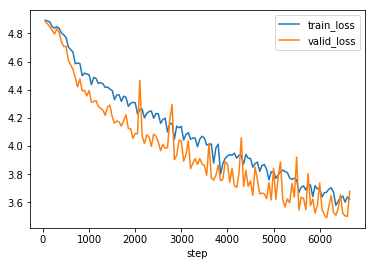

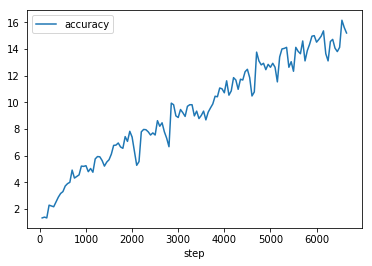

In [22]:
# show the training performance
import pandas as pd
graph = pd.DataFrame(train_stats, columns=['epoch','step','train_loss','valid_loss','accuracy','elapsed'])
graph.plot.line(x='step',y=['train_loss', 'valid_loss']);
graph.plot.line(x='step',y='accuracy');


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))


In [24]:
# call test function    
test(dataloaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.513851

Test Accuracy: 16% (138/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## DONE : Specify data loaders

# Re-using existing dataloaders

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
import torchvision.models as models
import torch.nn as nn

def build_model_vgg():
    """ 
        Pretrained : VGG16
    """
    
    # load the pre-trained model
    model = models.vgg16(pretrained=True)

    # freeze pre-trained features
    #
    # except last layer of 512->512 convolution
    #
    for p in model.features[:-3].parameters():
        p.requires_grad = False
    
    # classifier configuration
    n_inputs = 25088
    hidden_units = [2048, 512]
    
    # classifier input layer
    layers = list()
    layers.append( ('input', nn.Linear(n_inputs, hidden_units[0])) )
    layers.append( ('relu0', nn.ReLU()) )
    layers.append( ('drop0', nn.Dropout(dropout)) )

    # hidden layers
    for i in range(1, len(hidden_units)):
        layers.append( (f"layer{i}", nn.Linear(hidden_units[i-1], hidden_units[i])) )
        layers.append( (f"relu{i}", nn.ReLU()) )
        layers.append( (f"drop{i}", nn.Dropout(dropout)) )

    # output layer
    layers.append( ('layerz', nn.Linear(hidden_units[-1], n_outputs)) )
    
    # create classifier
    model.classifier = nn.Sequential(OrderedDict(layers))

    return model


In [23]:
# Instantiate the transfer learning model

model_transfer = build_model_vgg()

print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [24]:
# hyperparameters for transfer model

epochs = 30
learn_rate = 0.001

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

> I chose to use a VGG16 model - good accuracy and manageable size.

> I froze the convolutional layers and kept those pre-trained features.

> I deleted the classifier layers and replaced them with my own.

> The classifier used the network that was successful in the from-stratch model with 2048, 512 for hidden layers.  I tried a few others but none improved on this.

> Trained classifier layers using the same datasets prepared previously.

> This method of using pre-trained convolutional layers and training classifier layers only was used in our AIPND as well.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=learn_rate)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
from workspace_utils import active_session

with active_session():
    
    # train the model
    model_transfer = train(epochs, dataloaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Started training  : 05-09-2020 21:54:48 UTC
Learn rate        : 0.001
Training images   : 6680
Validation images : 835
Testing images    : 836
Outputs           : 133

 Epoch   Step     Train loss     Val loss    Accuracy%    Elapsed    Saved
 1 /30   50            4.959        4.563        3.473   00:01:20        Y
 1 /30   100           4.693        3.640        8.443   00:02:42        Y
 1 /30   150           4.431        3.080       12.495   00:04:04        Y
 2 /30   200           3.684        2.770       26.707   00:05:22        Y
 2 /30   250           3.411        2.441       29.820   00:06:39        Y
 2 /30   300           3.288        2.108       32.854   00:07:54        Y
 3 /30   350           3.323        2.267       34.970   00:09:11         
 3 /30   400           2.898        1.930       39.760   00:10:27        Y
 3 /30   450           2.829        1.789       42.275   00:11:44        Y
 3 /30   500           2.787        1.756       43.922   00:13:00        Y
 4 /30 

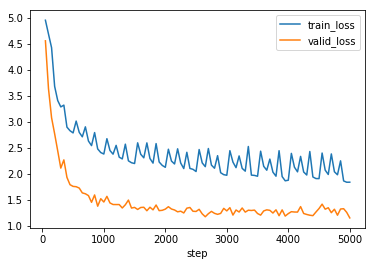

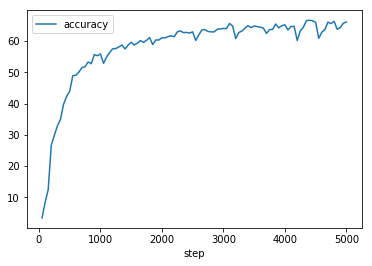

In [27]:
# show the training performance
import pandas as pd
graph = pd.DataFrame(train_stats, columns=['epoch','step','train_loss','valid_loss','accuracy','elapsed'])
graph.plot.line(x='step',y=['train_loss', 'valid_loss']);
graph.plot.line(x='step',y='accuracy');

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(dataloaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.274292

Test Accuracy: 65% (544/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### DONE : Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]


def predict_breed_transfer(img_path, topk):
    
    # load the file using PIL
    image = Image.open(img_path)

    # input data pre-processing
    image_data = process_image(image)
    
    # convert to torch tensor
    image_tensor = torch.from_numpy(image_data).float()

    # move to compute device
    image_tensor = image_tensor.to(device)
    
    # make sure in inference mode
    model_transfer.eval()
    
    # feed forward
    output = model_transfer(image_tensor.view(1,3,224,224))

    # output probabilities
    #ps = torch.exp(output)      # for use with NLLLoss
    softmax = nn.Softmax(dim=1)  
    ps = softmax(output)         # for use with CrossEntropyLoss
    
    # top k probabilities
    top_ps,top_class = ps.topk(topk, dim=1)

    # return results as python lists
    probs = top_ps.cpu().detach().tolist()[0]
    classes = top_class.cpu().detach().tolist()[0]
    
    return probs,classes

In [30]:
print(class_names[:5])

['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute']



Probabilities
 [0.9304144978523254, 0.021576514467597008, 0.019580252468585968, 0.013269239105284214, 0.01272275298833847]

Indices
 [42, 3, 78, 94, 5]


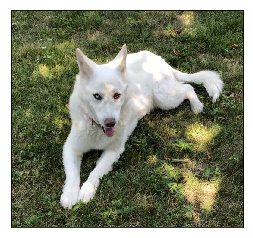


Index  Name                      Confidence
   42  Canaan dog                   93.0414
    3  Akita                         2.1577
   78  Great pyrenees                1.9580
   94  Kuvasz                        1.3269
    5  American eskimo dog           1.2723


In [31]:
# Test the above function on a sample image


# Aroma is a australian cattle dog + husky
# Taz is a german shepherd + husky

filename = 'uploads/aroma.jpg'
#filename = 'uploads/taz.jpg'


# view top k probabilities
k = 5

# get prediction
probs,classes = predict_breed_transfer(filename, k)

# display raw results
print("\nProbabilities\n",probs)
print("\nIndices\n",classes)

# display the image
ax = plt.imshow(Image.open(filename))
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

# display the confidence
print("\n{:>5}  {:<25} {:>10}".format('Index','Name','Confidence'))

for i in range(len(classes)):
    
    # retrieve the class and output label
    i_idx   = classes[i]
    i_name  = class_names[i_idx]
    print(f"{i_idx:>5d}  {i_name:<25} {probs[i]*100:10.4f}")



---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### DONE : Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    # handle cases for a human face, dog, and neither
    
    topk = 1
    
    # human detector
    is_human = face_detector(img_path)
    
    # dog detector
    is_dog = dog_detector(img_path)
    
    if is_human or is_dog:
    
        # get prediction
        probs,classes = predict_breed_transfer(img_path, topk)

        # display detected species
        if is_human:
            print("HUMAN")
        if is_dog:
            print("DOG")
        
        # display the breed and confidence
        print("{:<25} {:>10}".format('Species','Confidence'))
        
        for i in range(len(classes)):
            
            # retrieve the class and output label
            i_idx   = classes[i]
            i_name  = class_names[i_idx].title()
            print(f"{i_name:<25} {probs[i]*100:10.1f}%")

    else:
    
        print(f"\n\nNo dog or human in image")
        
        
    # display the image
    ax = plt.imshow(Image.open(img_path))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.show()

    print("\n\n")
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)


> Although this passes the minimums, I feel like I could do better on the accuracy. I'm neutral on the outcome because there is some improvement to make.

> In this instance I froze all convolutional layers - essentially I used the Small Dataset Different Data method, but re-used all features, then used my own classifier layers.

> I believe I accidentally flipped horizontal vs vertical axis in my data augmentation - so the playful canines were upside down when I meant to add mirror images along the vertical axis.  Improving augmentation may help improve accuracy.  I noticed this mistake just before submission so I just noted it instead of burning any more GPU time :)

> Will add code for early-stopping to mitigate overtraining and save GPU time.




HUMAN
Species                   Confidence
Dachshund                        3.1%


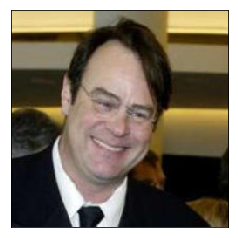




HUMAN
Species                   Confidence
Dachshund                        6.7%


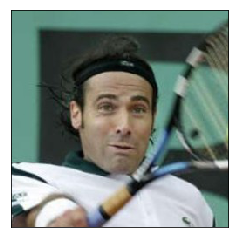




HUMAN
Species                   Confidence
Neapolitan Mastiff              11.1%


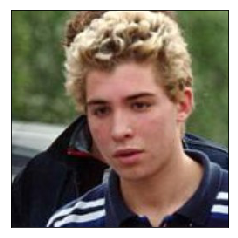




DOG
Species                   Confidence
Boxer                           93.3%


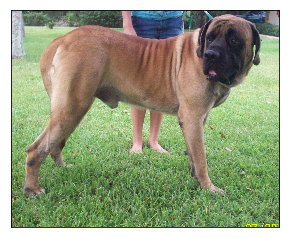




DOG
Species                   Confidence
Bullmastiff                     88.6%


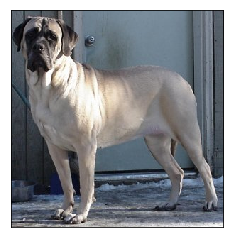




DOG
Species                   Confidence
Bloodhound                      79.4%


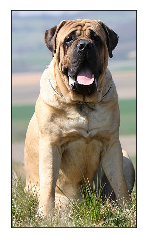

In [33]:
## DONE : Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.


# First a sanity check using the training image set

for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

DOG
Species                   Confidence
Canaan Dog                      93.0%


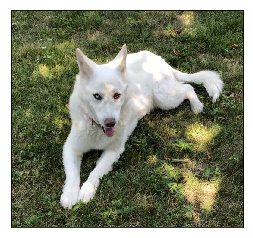




HUMAN
Species                   Confidence
Bull Terrier                    34.3%


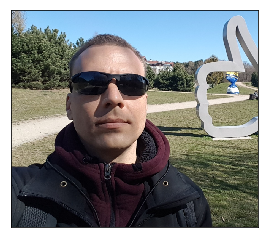






No dog or human in image


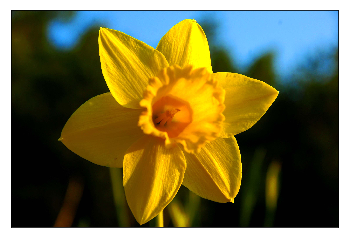




DOG
Species                   Confidence
Chihuahua                       70.7%


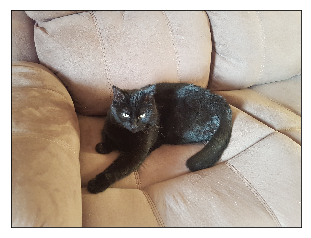




HUMAN
DOG
Species                   Confidence
German Shorthaired Pointer       56.5%


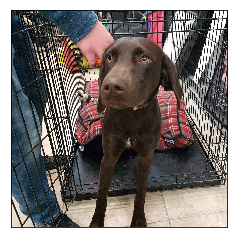




DOG
Species                   Confidence
Cardigan Welsh Corgi            97.2%


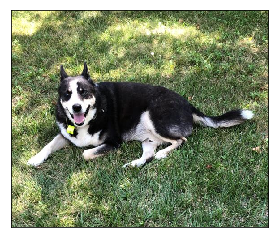

In [34]:
#
# Now run the algorithm on user supplied files
#

upload_files = np.array(glob("uploads/*"))

for file in np.hstack((upload_files)):
    run_app(file)